In [1]:
#%pip install nltk

In [2]:
#%pip install gensim

In [3]:
#%pip install torch

In [4]:
import pandas as pd  # DataFrames, CSV handling
import numpy as np  # Numerical operations
import re  # Regular expressions for text cleaning
import string  # Punctuation handling
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords removal
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Lemmatization & Stemming
from bs4 import BeautifulSoup  # Removing HTML tags
import contractions  # Expanding contractions (e.g., "don't" → "do not")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # BoW, TF-IDF
# from gensim.models import Word2Vec  # Word embeddings
import spacy  # Advanced NLP processing
!python -m spacy download en_core_web_sm  # Small English model
import matplotlib.pyplot as plt  # Standard plotting
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud  # Word cloud visualization
from collections import Counter  # Word frequency analysis
from textblob import TextBlob  # Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER for short text sentiment
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.pipeline import Pipeline  # Building ML pipelines
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.preprocessing.text import Tokenizer  # Text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding
from tensorflow.keras.models import Sequential  # Model initialization
from tensorflow.keras.layers import Embedding, LSTM, Dense  # Layers for RNN
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D  # Layers for CNN
from tensorflow.keras.layers import Dropout  # Dropout layer
# from transformers import BertTokenizer, TFBertModel  # BERT model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import scikitplot as skplt  # Pretty confusion matrix
import datetime  # Handling dates
import time  # Time conversions
import joblib  # Save & load ML models
import pickle  # Save Python objects
import warnings  # Ignore warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
ERROR: Invalid requirement: '#'


In [5]:
dfmovies=pd.read_csv("prime_videos.csv")
dfmovies.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",B013488XFS,B013488XFS,2015-08-24 03:07:17.000,True,Prime Video,Sneaky Pete,4.6,56658.0,['A\xa0con man (Giovanni Ribisi) on the run fr...,NaN,Suspense
1,5,Five Stars,My Kiddos LOVE this show!!,B00CB6VTDS,B00CB6VTDS,2016-04-19 21:16:50.000,True,Prime Video,Creative Galaxy,4.8,6403.0,['Follow the adventures of Arty and his sideki...,NaN,Kids
2,5,What Love Is...,"...isn't always how you expect it to be, but w...",B001H1SVZC,B001H1SVZC,2020-05-28 04:13:47.074,True,Prime Video,NaN,4.5,389.0,NaN,NaN,NaN
3,5,QUIRKY TURNS TO HEARTSTRINGS,As you learn about the very unique characters ...,B06WVW16WY,B06WVW16WY,2020-04-16 01:15:47.540,True,Prime Video,NaN,4.8,1966.0,NaN,NaN,NaN
4,5,Way better than the harsh reviews.,Our family loved the film. We have kids and th...,B07RXM26FG,B07RXM26FG,2019-09-29 05:17:12.700,True,Prime Video,NaN,4.5,57962.0,NaN,NaN,NaN


In [6]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233610 entries, 0 to 233609
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             233610 non-null  int64  
 1   title_x            233586 non-null  object 
 2   text               233579 non-null  object 
 3   asin               233610 non-null  object 
 4   parent_asin        233610 non-null  object 
 5   timestamp          233610 non-null  object 
 6   verified_purchase  233610 non-null  bool   
 7   main_category      233610 non-null  object 
 8   title_y            33800 non-null   object 
 9   average_rating     233607 non-null  float64
 10  rating_number      233607 non-null  float64
 11  description        33800 non-null   object 
 12  price              24165 non-null   float64
 13  categories         33800 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 23.4+ MB


In [7]:
dfmovies.describe()

,rating,average_rating,rating_number,price
count,233610.000000,233607.000000,233607.000000,24165.000000
mean,4.110111,4.437982,13781.706195,14.570061
std,1.287133,0.455424,22317.671491,7.190882
min,1.000000,1.000000,2.000000,0.000000
25%,4.000000,4.300000,752.000000,9.990000
50%,5.000000,4.600000,4375.000000,14.690000
75%,5.000000,4.700000,18000.000000,16.790000
max,5.000000,5.000000,241924.000000,124.990000


In [8]:
dfmovies.shape

(233610, 14)

In [9]:
dfmovies.isnull().sum()

rating                    0
title_x                  24
text                     31
asin                      0
parent_asin               0
timestamp                 0
verified_purchase         0
main_category             0
title_y              199810
average_rating            3
rating_number             3
description          199810
price                209445
categories           199810
dtype: int64

In [10]:
dfmovies.nunique()

rating                    5
title_x              128590
text                 203164
asin                  60212
parent_asin           60212
timestamp            232499
verified_purchase         2
main_category             1
title_y                7847
average_rating           40
rating_number         11383
description            8367
price                   217
categories               29
dtype: int64

In [11]:
dfmovies.duplicated().sum()

538

In [12]:
dfmovies.dropna(inplace=True)

In [13]:
dfmovies.drop_duplicates(inplace=True)

In [14]:
dfmovies.isnull().sum()

rating               0
title_x              0
text                 0
asin                 0
parent_asin          0
timestamp            0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
description          0
price                0
categories           0
dtype: int64

In [15]:
dfmovies.duplicated().sum()

0

In [16]:
dfmovies['timestamp'] = pd.to_datetime(dfmovies['timestamp'], errors='coerce')

In [17]:
dfmovies['year'] = dfmovies['timestamp'].dt.year
dfmovies['month'] = dfmovies['timestamp'].dt.month
dfmovies['weekday'] = dfmovies['timestamp'].dt.day_name()

In [18]:
dfmovies.to_csv('cleaned_dfmovies.csv', index=False)

#### 2.Data Distribution & Imbalance
##### Visualize distributions of numerical variables:



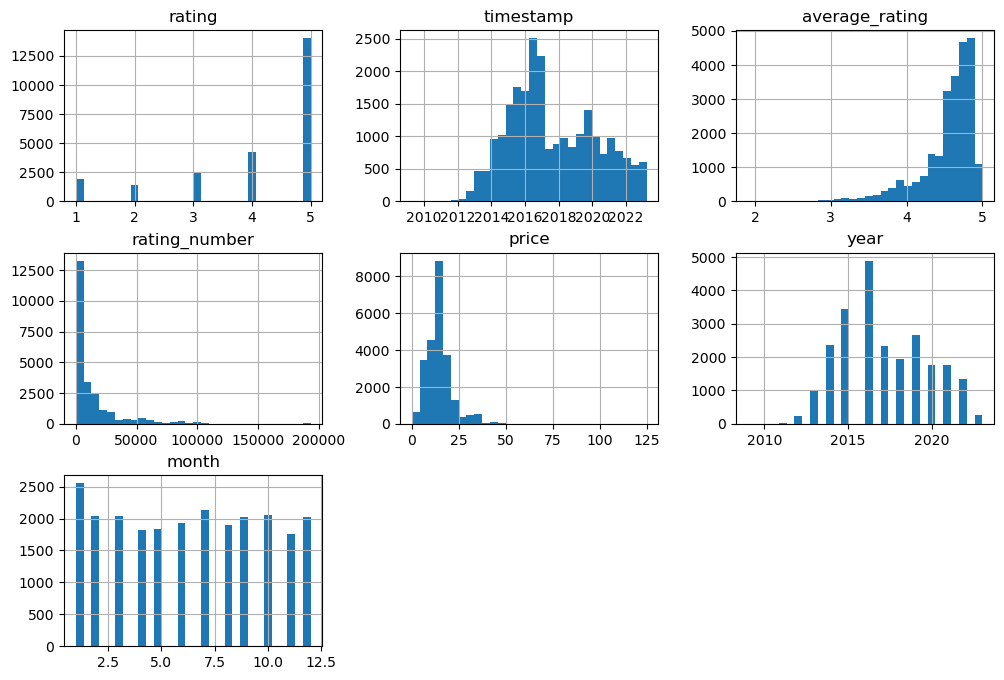

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

dfmovies.hist(figsize=(12, 8), bins=30)
plt.show()


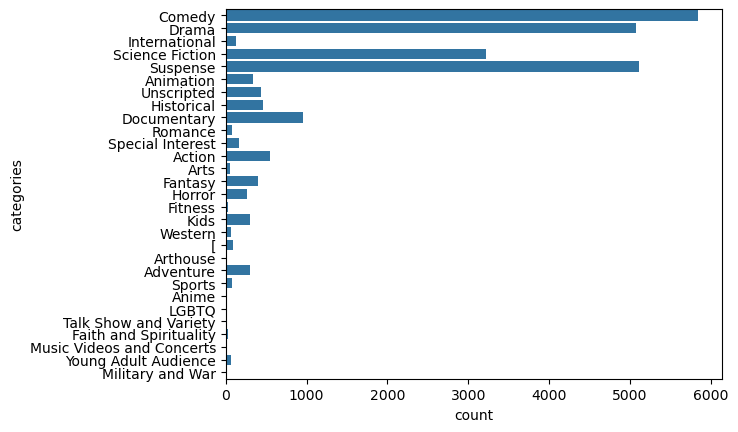

In [20]:
#Check categorical distributions

sns.countplot(y=dfmovies['categories'])
plt.show()


#### Correlation & Feature Relationships
##### Compute correlation between numerical features

In [21]:
rating_map = {
    'One Star': 1, 'Two Stars': 2, 'Three Stars': 3,
    'Four Stars': 4, 'Five Stars': 5
}
dfmovies['rating'] = dfmovies['rating'].replace(rating_map).astype(float)

In [22]:
numeric_df = dfmovies.select_dtypes(include=['number'])  # Keep only numeric columns

In [23]:
print(numeric_df.corr())


                  rating  average_rating  rating_number     price      year  \
rating          1.000000        0.341812       0.066324  0.126773 -0.034183   
average_rating  0.341812        1.000000       0.229701  0.290215 -0.142148   
rating_number   0.066324        0.229701       1.000000  0.041735  0.142928   
price           0.126773        0.290215       0.041735  1.000000 -0.120721   
year           -0.034183       -0.142148       0.142928 -0.120721  1.000000   
month           0.004706       -0.030443      -0.013743 -0.000696 -0.090952   

                   month  
rating          0.004706  
average_rating -0.030443  
rating_number  -0.013743  
price          -0.000696  
year           -0.090952  
month           1.000000  


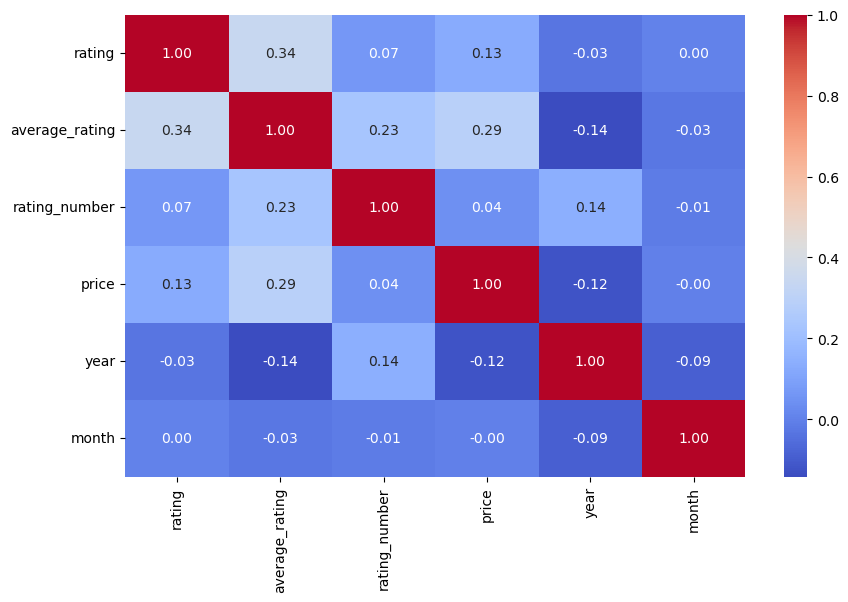

In [24]:
#Visualize correlations using a 
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


##### *Feature Engineering: Text Vectorization for NLP*
##### *1. Bag-of-Words (BoW) Representation*



In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW vectorizer
bow_vectorizer = CountVectorizer()

# Convert processed text into BoW feature matrix
bow_matrix = bow_vectorizer.fit_transform(dfmovies['text'])

*What it does:*
 Converts text into a sparse matrix of word counts, where each column represents a unique word, and each row corresponds to a document (text sample).

*Use case:* 
Simple and interpretable for NLP tasks like sentiment analysis, but lacks context or semantic meaning.

### *2. TF-IDF (Term Frequency - Inverse Document Frequency) Representation*

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert processed text into TF-IDF feature matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(dfmovies['text'])

- *What it does*: Assigns a weight to each word based on its frequency in a document relative to its occurrence in the entire dataset.  
- *Use case*: Helps reduce the impact of common words while highlighting important terms in a document.

#### *3. Word Embeddings (Word2Vec)*

In [27]:
from gensim.models import Word2Vec

# Tokenize text into lists of words
tokenized_text = [text.split() for text in dfmovies['text']]

# Train Word2Vec model on the dataset
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create dictionary mapping words to their vector representations
word_vectors = {word: word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key}

ImportError: cannot import name 'triu' from 'scipy.linalg' (c:\Users\ADMIN\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

- *What it does*: Learns vector representations for words, capturing semantic relationships (e.g., "king" and "queen" have similar vectors).  
- *Use case*: Useful for deep learning models, recommendation systems, and tasks that require word similarity analysis.

#### *4. Transformer-based Embeddings (BERT)*

In [ ]:
import torch

# from transformers import BertTokenizer, BertModel
from transformers import DistilBertTokenizer, DistilBertModel

# # Load BERT tokenizer and model
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = BertModel.from_pretrained('bert-base-uncased')

bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to generate BERT embeddings
def get_bert_embedding(text):
    inputs = bert_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT embedding to each processed text
dfmovies['bert_embedding'] = dfmovies['text'].apply(get_bert_embedding)

Preprocessing the Text
Since the dataset is already cleaned, we just need to convert text into numerical representations:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust feature count as needed
X_tfidf = vectorizer.fit_transform(dfmovies['text'])  # Replace with actual column name
y = dfmovies['rating']  # Replace with actual label column name

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Train the SVM Model
We will use LinearSVC from sklearn.svm, which is optimized for text classification:

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0)  # C controls regularization
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6630727762803235
Classification Report:
               precision    recall  f1-score   support

         1.0       0.59      0.51      0.55       353
         2.0       0.32      0.13      0.19       265
         3.0       0.44      0.35      0.39       510
         4.0       0.40      0.14      0.21       852
         5.0       0.72      0.95      0.82      2843

    accuracy                           0.66      4823
   macro avg       0.50      0.41      0.43      4823
weighted avg       0.61      0.66      0.61      4823



Hyperparameter Tuning (Optional)
To improve performance, you can tune the C parameter and experiment with different kernels:

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}  # Try different regularization strengths
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'C': 1}
Best accuracy: 0.6552957580307824


Save and Deploy the Model (Optional)
If you plan to reuse the model:

In [34]:
import joblib

joblib.dump(svm_model, "svm_nlp_model.pkl")  # Save model
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # Save vectorizer

# Load and use model later
svm_model = joblib.load("svm_nlp_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
